<a href="https://colab.research.google.com/github/jainstuti/MachineLearningLabs/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#importing dataset
dataset = pd.read_csv('/content/creditcard.csv')

In [ ]:
#visualising the data
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4b1a4210>,
      dtype=object)

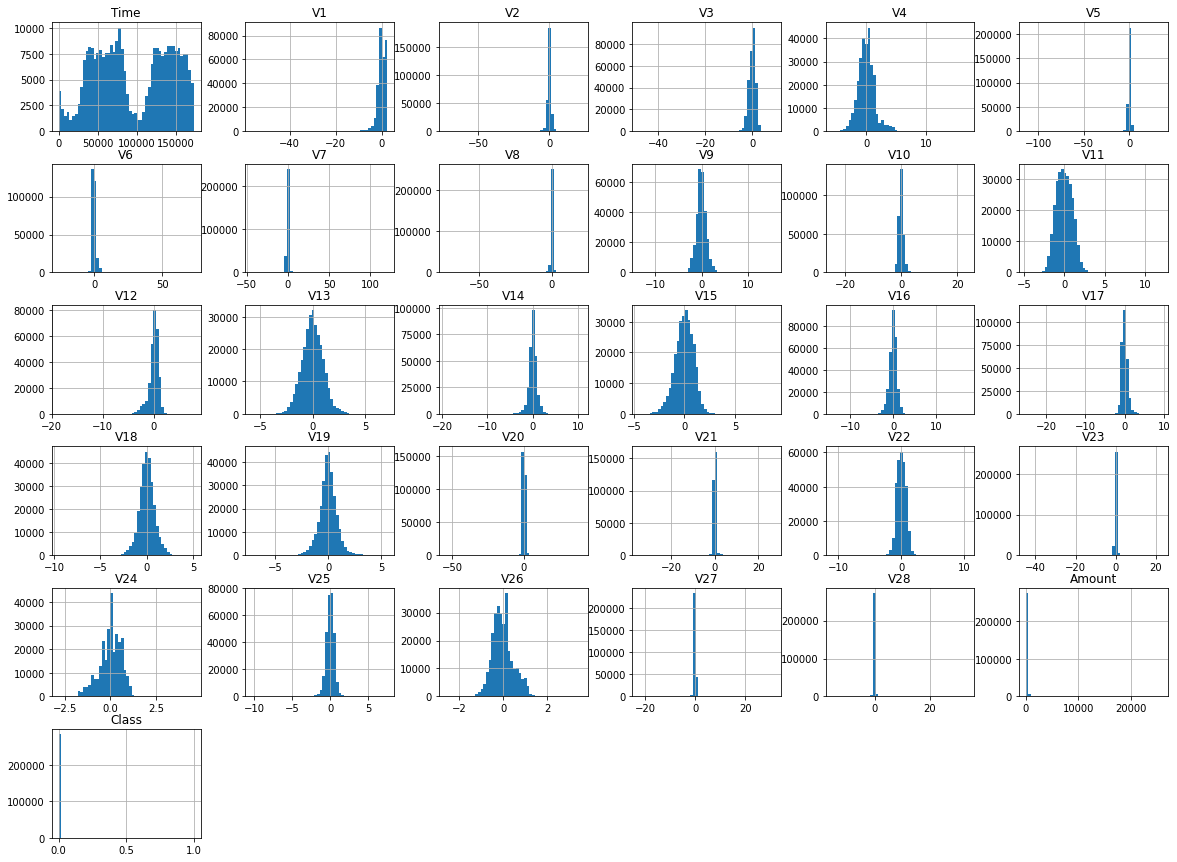

In [ ]:
dataset.hist(bins=50, figsize=(20, 15))

In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


In [ ]:
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
#spitting data into trin and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[ 2.36100000e+04  1.38752494e+00 -5.47811116e-01 ... -9.65601597e-02
  -1.48461215e-02  3.13500000e+01]
 [ 3.65160000e+04  1.02117876e+00 -1.94113665e-01 ...  9.11875105e-02
   3.59594694e-02  4.12900000e+01]
 [ 6.04650000e+04 -1.13445277e+00  6.36842930e-01 ...  5.72469651e-02
   1.02960891e-01  2.32700000e+01]
 ...
 [ 5.50950000e+04 -1.14996324e+00  1.69646167e+00 ... -1.62046536e-01
   3.11927890e-02  7.58000000e+00]
 [ 1.62728000e+05  1.75455368e+00 -6.99398285e-01 ... -5.85290816e-03
  -1.96220758e-02  9.48000000e+01]
 [ 7.85760000e+04 -7.07635006e-01  4.93302266e-01 ... -3.85588609e-01
  -2.05588932e-01  5.78000000e+01]]


In [ ]:
print(y_train)

[0 0 0 ... 0 0 0]


In [ ]:
print(X_test)

[[ 1.19907000e+05 -6.11711999e-01 -7.69705324e-01 ...  6.65013699e-02
   2.21179560e-01  1.79000000e+00]
 [ 7.83400000e+04 -8.14681711e-01  1.31921886e+00 ...  1.62427330e-01
   5.94562455e-02  1.98000000e+00]
 [ 8.23820000e+04 -3.18193485e-01  1.11861770e+00 ...  2.49049701e-01
   9.25156059e-02  8.90000000e-01]
 ...
 [ 8.96500000e+04 -7.24439031e-01 -1.22047318e-01 ...  2.25042168e-01
   3.73454054e-03  4.49100000e+01]
 [ 5.69690000e+04  1.11927867e+00 -1.71386394e-01 ...  5.23645610e-02
   2.20855794e-02  1.93700000e+01]
 [ 5.50270000e+04 -1.23485119e+00 -1.14143357e-01 ...  3.42660282e-02
  -4.82263705e-02  8.10000000e-01]]


In [ ]:
print(y_test)

[0 0 0 ... 0 0 0]


In [ ]:
#feature scaling-normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[1.36638270e-01 9.81866109e-01 7.61478151e-01 ... 4.14728672e-01
  3.12822591e-01 1.22026409e-03]
 [2.11329228e-01 9.75642341e-01 7.65210182e-01 ... 4.18194066e-01
  3.13853593e-01 1.60716760e-03]
 [3.49929395e-01 9.39020829e-01 7.73978001e-01 ... 4.17567601e-01
  3.15213258e-01 9.05759024e-04]
 ...
 [3.18851567e-01 9.38757325e-01 7.85158545e-01 ... 4.13519943e-01
  3.13756862e-01 2.95043120e-04]
 [9.41756563e-01 9.88101473e-01 7.59878682e-01 ... 4.16402921e-01
  3.12725673e-01 3.68998519e-03]
 [4.54743275e-01 9.46271935e-01 7.72463435e-01 ... 4.09393866e-01
  3.08951833e-01 2.24980110e-03]]


In [ ]:
print(X_test)

[[6.93938377e-01 9.47901548e-01 7.59136839e-01 ... 4.17738416e-01
  3.17612278e-01 6.96737711e-05]
 [4.53377471e-01 9.44453344e-01 7.81178076e-01 ... 4.19508990e-01
  3.14330415e-01 7.70693110e-05]
 [4.76769758e-01 9.52888064e-01 7.79061437e-01 ... 4.21107842e-01
  3.15001291e-01 3.46422661e-05]
 ...
 [5.18831890e-01 9.45986455e-01 7.65970588e-01 ... 4.20664717e-01
  3.13199650e-01 1.74807210e-03]
 [3.29696977e-01 9.77308937e-01 7.65449988e-01 ... 4.17477483e-01
  3.13572049e-01 7.53955835e-04]
 [3.18458030e-01 9.37315184e-01 7.66053986e-01 ... 4.17143425e-01
  3.12145203e-01 3.15283545e-05]]


In [ ]:
#training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# testing
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56867     8]
 [   41    46]]


0.9991397773954567

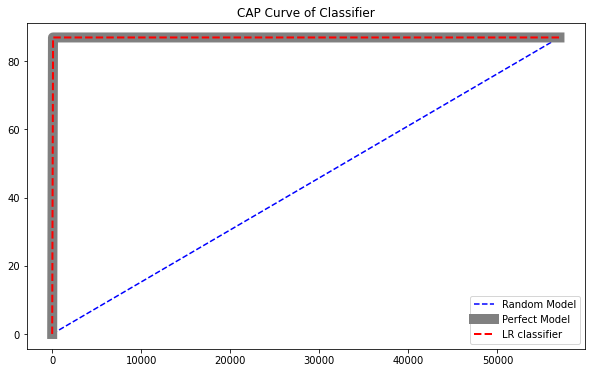

In [ ]:
#CAP Analysis
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 
lm_lr = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_lr = np.append([0], np.cumsum(lm_lr)) 
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 10, label = 'Perfect Model')
plt.title('CAP Curve of Classifier')
plt.plot(x, y_lr, c = 'r', linestyle = '--', label = 'LR classifier', linewidth = 2)
plt.legend()